In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score,log_loss
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.impute import KNNImputer

In [3]:
train = pd.read_csv('/machine_hack/Pet Classification/train.csv')
test = pd.read_csv('/machine_hack/Pet Classification/test.csv')

In [4]:
train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
test.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [6]:
test.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [7]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

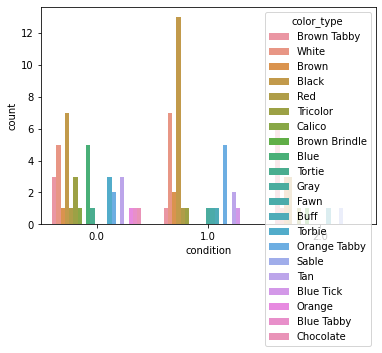

In [8]:
sns.countplot('condition',hue='color_type',data=train[:100])

In [9]:
res=pd.value_counts(train.color_type)
len(res)

56

In [10]:
pd.value_counts(train.condition)

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [11]:
train.issue_date = pd.to_datetime(train.issue_date)

In [12]:
train.listing_date = pd.to_datetime(train.listing_date)

In [13]:
pd.value_counts(train.issue_date), pd.value_counts(train.listing_date)

(2017-03-20    41
 2016-07-10    40
 2016-10-20    35
 2016-05-04    35
 2017-07-05    35
               ..
 2013-02-04     1
 2011-12-15     1
 2006-03-31     1
 2006-08-20     1
 2002-09-18     1
 Name: issue_date, Length: 3907, dtype: int64,
 2017-07-28 00:00:00    17
 2019-01-27 00:00:00    11
 2016-10-12 00:00:00     9
 2017-11-27 00:00:00     9
 2018-07-08 00:00:00     7
                        ..
 2018-01-25 22:25:00     1
 2018-08-30 17:14:00     1
 2017-10-05 11:25:00     1
 2018-01-09 13:57:00     1
 2016-08-14 13:35:00     1
 Name: listing_date, Length: 17209, dtype: int64)

In [14]:
train['issue_YEAR'] = train.issue_date.dt.year
train['issue_MONTH'] = train.issue_date.dt.month
train['issue_DAY'] = train.issue_date.dt.day
train['issue_DAYOFWEEK'] = train.issue_date.dt.dayofweek

In [15]:
train['listing_YEAR'] = train.listing_date.dt.year
train['listing_MONTH'] = train.listing_date.dt.month
train['listing_DAY'] = train.listing_date.dt.day
train['listin_DAYOFWEEK'] = train.listing_date.dt.dayofweek

In [16]:
train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,6,2016,9,21,2
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,3,2018,12,27,3
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,6,2016,10,19,2
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,5,2019,1,25,4
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,3,2017,11,19,6


In [17]:
train.pet_id.nunique(),len(train)

(18834, 18834)

In [18]:
# train = train.drop(['pet_id','issue_date','listing_date'],axis=1)

In [19]:
train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,6,2016,9,21,2
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,3,2018,12,27,3
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,6,2016,10,19,2
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,5,2019,1,25,4
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,3,2017,11,19,6


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
train.color_type = le.fit_transform(train.color_type)

In [23]:
train[train.breed_category==2.0].condition.isnull().sum()

1477

In [24]:
pd.value_counts(train.breed_category)

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [25]:
train.X1.var(), train.X2.var()

(43.195998064531025, 12.374658366217043)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

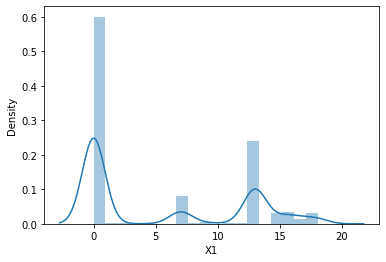

In [26]:
sns.distplot(train.X1)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

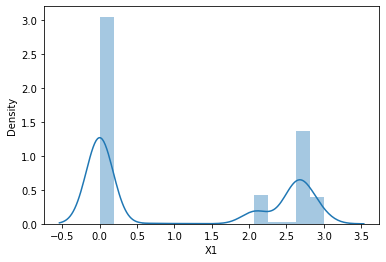

In [27]:
sns.distplot(np.log(1+train.X1))

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X2', ylabel='Density'>

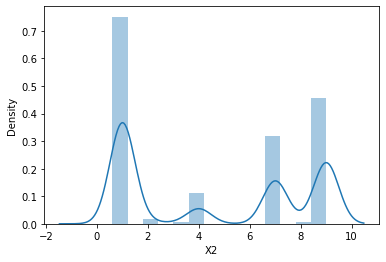

In [28]:
sns.distplot(train.X2)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X2', ylabel='Density'>

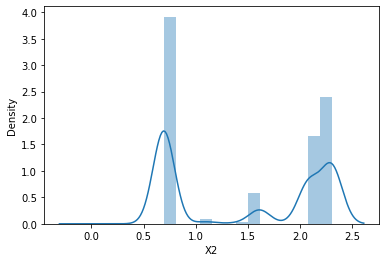

In [29]:
sns.distplot(np.log(1+train.X2))

In [30]:
train['log_X1'] = np.log(1+train.X1)

In [31]:
train['log_X2'] = np.log(1+train.X2)

In [32]:
train.log_X1.var(),train.log_X2.var()

(1.6514030408799858, 0.5375304287549463)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='count'>

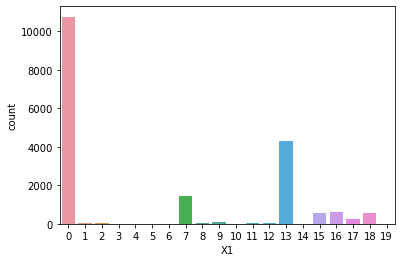

In [33]:
sns.countplot('X1',data=train)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2', ylabel='count'>

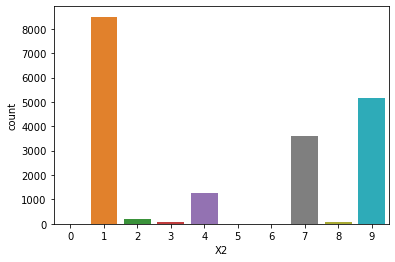

In [34]:
sns.countplot('X2',data=train)

In [35]:
train.condition = train.condition.fillna(3)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='count'>

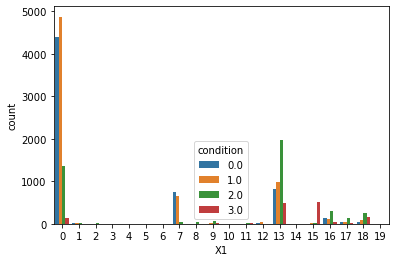

In [36]:
sns.countplot('X1',hue='condition',data=train)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2', ylabel='count'>

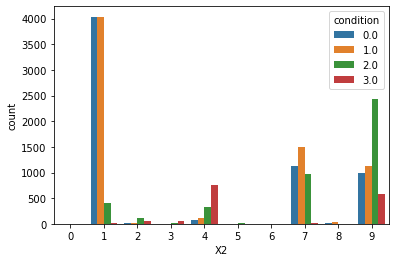

In [37]:
sns.countplot('X2',hue='condition',data=train)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issue_DAYOFWEEK', ylabel='count'>

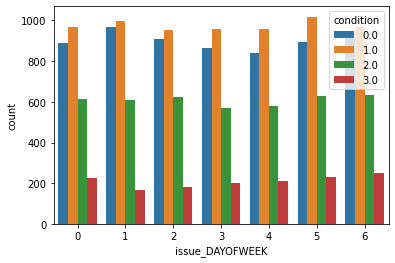

In [38]:
sns.countplot('issue_DAYOFWEEK',hue='condition',data=train)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listin_DAYOFWEEK', ylabel='count'>

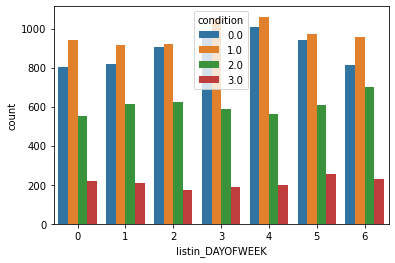

In [39]:
sns.countplot('listin_DAYOFWEEK',hue='condition',data=train)

In [40]:
train.groupby('condition')['issue_MONTH'].mean()

condition
0.0    6.715650
1.0    6.678105
2.0    7.190040
3.0    6.909953
Name: issue_MONTH, dtype: float64

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issue_MONTH', ylabel='count'>

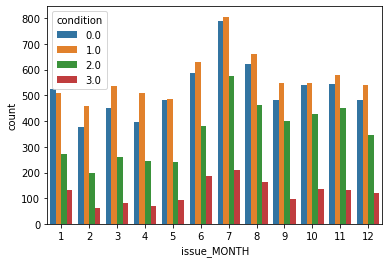

In [41]:
sns.countplot('issue_MONTH',hue='condition',data=train)

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listing_MONTH', ylabel='count'>

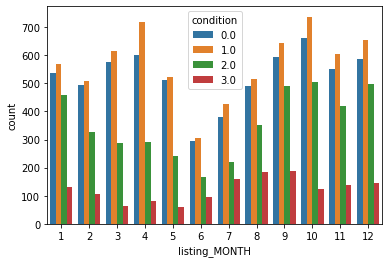

In [42]:
sns.countplot('listing_MONTH',hue='condition',data=train)

In [43]:
train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,...,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,18,0.80,7.78,13,9,0.0,...,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,53,0.72,14.19,13,9,0.0,...,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,3.0,15,0.15,40.90,15,4,2.0,...,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,53,0.62,17.82,0,1,0.0,...,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,2,0.50,11.06,18,4,0.0,...,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [44]:
train = train.drop(['pet_id','issue_date','listing_date'],axis=1)

In [45]:
train.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18,0.80,7.78,13,9,0.0,1,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,1.0,53,0.72,14.19,13,9,0.0,2,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,3.0,15,0.15,40.90,15,4,2.0,4,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,1.0,53,0.62,17.82,0,1,0.0,2,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,2.0,2,0.50,11.06,18,4,0.0,1,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [46]:
train1 = pd.DataFrame(train.values,columns=train.columns)

In [47]:
train1.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18.0,0.80,7.78,13.0,9.0,0.0,1.0,2016.0,7.0,10.0,6.0,2016.0,9.0,21.0,2.0,2.639057,2.302585
1,1.0,53.0,0.72,14.19,13.0,9.0,0.0,2.0,2013.0,11.0,21.0,3.0,2018.0,12.0,27.0,3.0,2.639057,2.302585
2,3.0,15.0,0.15,40.90,15.0,4.0,2.0,4.0,2014.0,9.0,28.0,6.0,2016.0,10.0,19.0,2.0,2.772589,1.609438
3,1.0,53.0,0.62,17.82,0.0,1.0,0.0,2.0,2016.0,12.0,31.0,5.0,2019.0,1.0,25.0,4.0,0.000000,0.693147
4,2.0,2.0,0.50,11.06,18.0,4.0,0.0,1.0,2017.0,9.0,28.0,3.0,2017.0,11.0,19.0,6.0,2.944439,1.609438


In [48]:
train1.breed_category = train1.breed_category.astype(int)

In [49]:
y1 = train1.pet_category.astype(int)

In [50]:
y2 = train1.breed_category.astype(int)

In [51]:
X = train1.drop(['breed_category','pet_category'],axis=1)

In [52]:
from xgboost import XGBClassifier

In [53]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X.values , y1.values , test_size = 0.3 , random_state = 0
                                                    )

In [54]:
random_state = 2
classifiers = []
#classifiers.append((SVC(random_state=random_state,probability=True)))
#classifiers.append((DecisionTreeClassifier(random_state=random_state)))
classifiers.append((AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)))
classifiers.append((RandomForestClassifier(random_state=random_state)))
classifiers.append((ExtraTreesClassifier(random_state=random_state)))
classifiers.append((GradientBoostingClassifier(random_state=random_state)))
classifiers.append((XGBClassifier(random_state=random_state)))

In [55]:
kfold = StratifiedKFold(n_splits=10)

In [56]:
gb = GradientBoostingClassifier(n_estimators=150,
                                criterion='friedman_mse',max_depth=8)
gb.fit(X1_train,y1_train)

GradientBoostingClassifier(max_depth=8, n_estimators=150)

In [57]:
cross_val_score(gb,X1_train,y1_train,scoring='f1_weighted',cv=5)

array([0.89261393, 0.89139272, 0.90193098, 0.90587631, 0.90039608])

In [58]:
xg = XGBClassifier(n_estimators=250,max_depth=8,gamma=1,colsample_bytree=0.7,subsample=1,reg_lambda=1,
                   min_child_weight=1,learning_rate=0.33,max_delta_step=0.5,sampling_method='uniform',random_state=23
                  )
xg.fit(X1_train,y1_train)

C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.33, max_delta_step=0.5, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=23, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [59]:
cross_val_score(xg,X1_train,y1_train,scoring='f1_weighted',cv=kfold)

C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.89168344, 0.89716433, 0.89653514, 0.89130674, 0.90194082,
       0.91232113, 0.90881172, 0.90779854, 0.88971792, 0.90829631])

In [60]:
train.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18,0.80,7.78,13,9,0.0,1,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,1.0,53,0.72,14.19,13,9,0.0,2,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,3.0,15,0.15,40.90,15,4,2.0,4,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,1.0,53,0.62,17.82,0,1,0.0,2,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,2.0,2,0.50,11.06,18,4,0.0,1,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [61]:
train.breed_category = train.breed_category.astype(int)

In [62]:
train.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18,0.80,7.78,13,9,0,1,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,1.0,53,0.72,14.19,13,9,0,2,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,3.0,15,0.15,40.90,15,4,2,4,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,1.0,53,0.62,17.82,0,1,0,2,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,2.0,2,0.50,11.06,18,4,0,1,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [63]:
train2 = train.drop(['breed_category'],axis=1)

In [64]:
train2.head(5)

,condition,color_type,length(m),height(cm),X1,X2,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18,0.80,7.78,13,9,1,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,1.0,53,0.72,14.19,13,9,2,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,3.0,15,0.15,40.90,15,4,4,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,1.0,53,0.62,17.82,0,1,2,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,2.0,2,0.50,11.06,18,4,1,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [65]:
X2 = train2

In [66]:
X2.head(5)

,condition,color_type,length(m),height(cm),X1,X2,pet_category,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,2.0,18,0.80,7.78,13,9,1,2016,7,10,6,2016,9,21,2,2.639057,2.302585
1,1.0,53,0.72,14.19,13,9,2,2013,11,21,3,2018,12,27,3,2.639057,2.302585
2,3.0,15,0.15,40.90,15,4,4,2014,9,28,6,2016,10,19,2,2.772589,1.609438
3,1.0,53,0.62,17.82,0,1,2,2016,12,31,5,2019,1,25,4,0.000000,0.693147
4,2.0,2,0.50,11.06,18,4,1,2017,9,28,3,2017,11,19,6,2.944439,1.609438


In [67]:
X2_train , X2_test , y2_train , y2_test = train_test_split(X2.values , y2.values , test_size = 0.3 , random_state = 0
                                                    )

In [68]:
xg2 = XGBClassifier(n_estimators=500,max_depth=8,gamma=1,colsample_bytree=0.7,subsample=1,reg_lambda=1,
                   min_child_weight=1,learning_rate=0.33,max_delta_step=0.5,sampling_method='uniform',base_score=0.7
                  )
xg2.fit(X2_train,y2_train)

C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.33, max_delta_step=0.5, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [69]:
cross_val_score(xg2,X2_train,y2_train,scoring='f1_weighted',cv=kfold)

C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jsaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.89451793, 0.90136558, 0.90062365, 0.90353885, 0.91114557,
       0.89675792, 0.88916659, 0.90431652, 0.90363111, 0.91201353])

In [70]:
gb2 = GradientBoostingClassifier(max_depth=8,n_estimators=150)
gb2.fit(X2_train,y2_train)
cross_val_score(gb2,X2_train,y2_train,cv=5)

array([0.89647327, 0.90405764, 0.89836936, 0.90174507, 0.90743551])

In [71]:
test.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [72]:
test.color_type = le.fit_transform(test.color_type)

In [73]:
len(pd.value_counts(test.color_type))

54

In [74]:
test.issue_date = pd.to_datetime(test.issue_date)
test.listing_date = pd.to_datetime(test.listing_date)

In [75]:
test['issue_YEAR'] = test.issue_date.dt.year
test['issue_MONTH'] = test.issue_date.dt.month
test['issue_DAY'] = test.issue_date.dt.day
test['issue_DAYOFWEEK'] = test.issue_date.dt.dayofweek

In [76]:
test['listing_YEAR'] = test.listing_date.dt.year
test['listing_MONTH'] = test.listing_date.dt.month
test['listing_DAY'] = test.listing_date.dt.day
test['listin_DAYOFWEEK'] = test.listing_date.dt.dayofweek

In [77]:
test.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,2,0.87,42.73,0,7,2005,8,17,2,2017,9,7,3
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,36,0.06,6.71,0,1,2018,11,15,3,2019,5,8,2
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,2,0.24,41.21,0,7,2012,10,11,3,2018,4,2,0
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,2,0.29,8.46,7,1,2015,2,13,4,2018,4,6,4
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,14,0.71,30.92,0,7,2017,1,18,2,2018,4,26,3


In [78]:
sub = pd.DataFrame()

In [79]:
sub['pet_id'] = test.pet_id

In [80]:
test = test.drop(['pet_id','issue_date','listing_date'],axis=1)

In [81]:
test.condition=test.condition.fillna(3)

In [82]:
test.condition = test.condition.astype(int)

In [83]:
test.head(5)

,condition,color_type,length(m),height(cm),X1,X2,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK
0,0,2,0.87,42.73,0,7,2005,8,17,2,2017,9,7,3
1,1,36,0.06,6.71,0,1,2018,11,15,3,2019,5,8,2
2,1,2,0.24,41.21,0,7,2012,10,11,3,2018,4,2,0
3,1,2,0.29,8.46,7,1,2015,2,13,4,2018,4,6,4
4,1,14,0.71,30.92,0,7,2017,1,18,2,2018,4,26,3


In [84]:
test['log_X1'] = np.log(1+test.X1)

In [85]:
test['log_X2'] = np.log(1+test.X2)

In [86]:
test.head(5)

,condition,color_type,length(m),height(cm),X1,X2,issue_YEAR,issue_MONTH,issue_DAY,issue_DAYOFWEEK,listing_YEAR,listing_MONTH,listing_DAY,listin_DAYOFWEEK,log_X1,log_X2
0,0,2,0.87,42.73,0,7,2005,8,17,2,2017,9,7,3,0.000000,2.079442
1,1,36,0.06,6.71,0,1,2018,11,15,3,2019,5,8,2,0.000000,0.693147
2,1,2,0.24,41.21,0,7,2012,10,11,3,2018,4,2,0,0.000000,2.079442
3,1,2,0.29,8.46,7,1,2015,2,13,4,2018,4,6,4,2.079442,0.693147
4,1,14,0.71,30.92,0,7,2017,1,18,2,2018,4,26,3,0.000000,2.079442


In [87]:
temp_test = test.drop(['pet_category'],axis=1)

KeyError: "['pet_category'] not found in axis"

In [ ]:
p1 = xg.predict(temp_test.values)

In [ ]:
temp_test['pet_category'] = p1

In [ ]:
p2 = xg2.predict(temp_test.values)

In [ ]:
sub['breed_category'] = p2
sub['pet_category'] = p1

In [ ]:
sub.pet_category = sub.pet_category.astype(int)

In [ ]:
sub.head(5)

In [ ]:
sub.to_csv('pet.csv',index=False)